# 白猫テニス 個人レート計算

## 手順
1. データ入力にしたがってデータ入力をする
2. Run(上部のメニュー)をクリック
    - 環境によってはRunではなく⏯みたいなのかも
    - PCからなら shift + Enter でもOK
3. メンバーの個人レート, チームレート, 層が表示される

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pprint as pp

mag = [None, 1.0, 0.5, 0.24, 0.20, 0.06, 0.006, 0.002, 0] #反映倍率, indexに層をとる
layor = [None, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 7, 8, 8] #層, indexにチーム内順位をとる
maxRank = [None, 0, 4, 7, 10, 13, 16, 17, 18] # 各層の一位のチーム内順位
minRank = [None, 3, 6, 9, 12, 15, 16, 17, 19] # 各層の再開のチーム内順位

class Team():
    members = []
    n_member = 0
    # members = [["名前", 個人レート, 層, 反映チームレート], ["名前2", 個人レート, 層, 反映チームレート], ...], 個人レートが高い順に格納される
    def __init__(self, name):
        self.name = name #チーム名
        
    def printMembers(self):
        for i in range(self.n_member):
            print( "[" + str( i + 1).zfill(2), end=" 位] [")
            print( str(layor[i+1]), end=" 層] " )
            print( self.members[i][0], end="\t" )
            print("個人レート : " + "{0:.3f}".format( self.members[i][1] ), end="\t" )
            print("チームレート: " + "{0:.3f}".format(self.members[i][1] * mag[layor[i+1]]))
            
    def printGraph(self):
        label = []
        left = []
        height = []
        height_t = []
        for i in range(self.n_member):
            label.append(self.members[i][0])
            height.append(self.members[i][1])
            height_t.append(self.members[i][1] * mag[layor[i+1]])
            left.append(i+1)
        left = np.array(left)
        height = np.array(height)
        height_t = np.array(height_t)
        print("\n個人レート")
        plt.bar(left, height, width=0.5, linewidth=10, tick_label=label, align="center")
        plt.show()
        print("チームレート")
        plt.bar(left, height_t, width=0.5, linewidth=10, tick_label=label, align="center")
        
    def printTeamRate(self):
        print("チームレート: " + str(calcTeamRate() ) )
        
    def calcTeamRate(self):
        rate = 0
        for i in range(self.n_member):
            rate += self.members[i][1] * mag[layor[i+1]]
        return rate
            
    def exchange(self, i, j):
        tmp = self.members[i]
        self.members[i] = self.members[j]
        self.members[j] = tmp
        
    def reset(self):
        self.members = []
    
    def setMem(self, name, aft, bef):
        change = False
        self.members.append([name])
        self.n_member += 1
        diff = bef - aft
        if self.n_member < 5:
            self.members[self.n_member-1].append(diff)
            for i in reversed( range(self.n_member-1) ):
                if diff > self.members[i][1]:
                    self.exchange(i, i+1)
                else :
                    break
        else :
            self.members[self.n_member-1].append(0)
            t_layor = layor[self.n_member] #仮層
            while(True):
                # -1層ビリの個人レート vs 仮層での個人レート  
                if (mag[t_layor] == 0 and diff > 0 ) or ( t_layor !=1 and self.members[minRank[t_layor-1]][1] < (bef - self.calcTeamRate()) / mag[t_layor] ):
                    t_rank = self.n_member-1
                    if change :
                        t_rank = maxRank[t_layor]
                    for i in reversed( range(maxRank[t_layor-1], t_rank) ):
                        self.exchange(i, i+1)
                    change = True
                    t_layor -= 1
                    continue
                else : # 仮層 は　正しい
                    if change:
                        self.members[ maxRank[t_layor] ][1] = ( bef - self.calcTeamRate() ) / mag[t_layor]
                        for i in range( maxRank[t_layor], minRank[t_layor] ):
                            if self.members[i][1] < self.members[i+1][1]:
                                self.exchange(i, i + 1)
                            else :      
                                break # for を 抜ける
                    else :
                        self.members[self.n_member-1][1] = diff / mag[t_layor]
                        for i in reversed( range(maxRank[t_layor], self.n_member-1) ):
                            if diff > self.members[i][1]:
                                self.exchange(i, i+1)
                            else :
                                break
                    break # while を　抜ける

## データ入力

[ **"名前"**, **抜ける前のレート**, **抜けた後のレート** ]
で全員のデータを入力する

- 全員のデータがないと個人レートを計算できない
- 最後の一人は残ったレート全てがその人のものなので [ "名前", **"抜ける前のレート"**, **0** ] でOK
- 抜けた順番に入力すること
### Sample
``` Python
name = "チーム名"
data = [
    ["Name1", 2250, 2000],
    ["Name2", 2000, 1500],
    ["Name3", 1500, 1000],
    ["Name4", 1000, 500],
    ["Name5", 500, 0]
]
```

[01 位] [1 層] Name5	個人レート : 500.000	チームレート: 500.000
[02 位] [1 層] Name4	個人レート : 500.000	チームレート: 500.000
[03 位] [1 層] Name3	個人レート : 500.000	チームレート: 500.000
[04 位] [1 層] Name2	個人レート : 500.000	チームレート: 500.000
[05 位] [2 層] Name1	個人レート : 500.000	チームレート: 250.000

個人レート


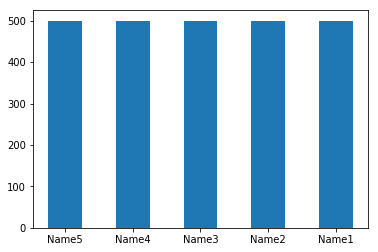

チームレート


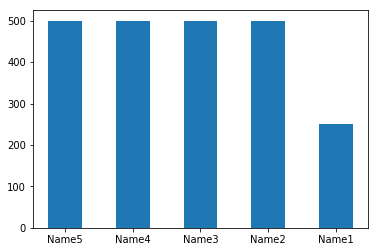

In [2]:
# データ入力
name = "ここにチーム名を入力する"
data = [
    ["Name1", 2250, 2000], #最初に抜けた人
    ["Name2", 2000, 1500], #2人目
    ["Name3", 1500, 1000], #3人目
    ["Name4", 1000, 500], #4人目...
    ["Name5", 500, 0] # 最後に抜けた人
]

team1 = Team( name )
for i in reversed( range( len(data) ) ):
    team1.setMem( data[i][0], data[i][2], data[i][1] )
    
team1.printMembers()
team1.printGraph()
        
# 入力を終えたら, ここを選択した状態でRunをクリック

## 注意点
- 1人でもデータがかけてたら(もしくは間違っていたら)、全員誤った個人レートが計算される
- 最後の一人以外抜けなきゃいけないから再建するときか、解散するときくらいしか計算できない
- 切り捨てとかその辺の関係で誤差が出ることがある
- データ入力は何度でも再利用できる(入力し直して, またRunすればOK)

## その他にできること
- メンバーのリセット： team1.reset()
- チームレートの表示：　team1.printTeamRate()
下のボックスとかに書いて同様にRunすれば表示される

In [ ]:
# ここに書いてRun